# Data Generation of Lorenz (Lorentz)

In [1]:
import os
import sys
import time
import math
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

sys.path.append("../SVAE/ODE")
from model import Lorentz63Model
from scheme import EulerScheme, RungeKuttaScheme

## generation (Euler, Runge Kutta)

In [15]:
seed = 128
np.random.seed(seed)
n_sample = 100
sigma = 10.
rho = 28.
beta = 8/3
dt = 0.01
T = 750
ds = 3 # down sampling
Tds = int(T/ds)
sys_sd = 0.
obs_sd = 0.1

model = Lorentz63Model(sigma, rho, beta)
# system = EulerScheme(dt, T, model, seed=seed)
system = RungeKuttaScheme(dt, T, model, seed=seed)

true = np.zeros((n_sample, T, 3), dtype=np.float32)
obs = np.zeros((n_sample, T, 3), dtype=np.float32)

for i in range(n_sample):
    print("\r sample={}/{}".format(i, n_sample), end="")
    initial = np.random.uniform(-10, 10, size=3)
    true[i], obs[i] = system.noise_added_simulation(initial, sys_sd, obs_sd)
    #true[i] = system.perfect_simulation(initial, sys_sd, obs_sd)

 sample=99/100

In [16]:
np.save("Lorentz/Lorentz_rk_true_ns100_dt001_T750_ds3_ssd0_osd01.npy", true[:,::ds])
np.save("Lorentz/Lorentz_rk_obs_ns100_dt001_T750_ds3_ssd0_osd01.npy", obs[:,::ds])

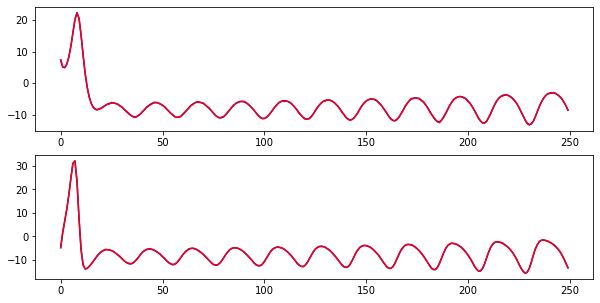

In [17]:
fig, ax = plt.subplots(2,1,figsize=(10,5))

for i in range(2):
    ax[i].plot(true[0,::ds,i], label="true", linestyle="-", c="b")
    ax[i].plot(obs[0,::ds,i], label="obs", linestyle="-", c="r")